In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
model = models.Sequential()

In [5]:
from tensorflow.keras import regularizers

In [6]:
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)))

kernel_regularizer=regularizers.l2(0.1) => L2 penalty, penalty strength = 0.1 <br>
https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer

In [7]:
model.add(layers.Dense(10, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [10]:
train_images.shape

(60000, 784)

In [11]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [12]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [13]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [14]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# metrics => 모형의 성능을 무엇으로 평가할 것인지에 대한 것
# 'accuracy' => 전체의 관측치 중에서 몇 개 관측치의 종속변수 값을 제대로 맞혔는지를 의미

In [15]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.5309 - accuracy: 0.9120 - val_loss: 0.3021 - val_accuracy: 0.9543
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2690 - accuracy: 0.9538 - val_loss: 0.2189 - val_accuracy: 0.9644
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2126 - accuracy: 0.9632 - val_loss: 0.2124 - val_accuracy: 0.9574
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1880 - accuracy: 0.9670 - val_loss: 0.2050 - val_accuracy: 0.9614
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1748 - accuracy: 0.9692 - val_loss: 0.1829 - val_accuracy: 0.9663
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1643 - accuracy: 0.9721 - val_loss: 0.1863 - val_accuracy: 0.9617
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1576 - accuracy: 0.9729 - val_loss: 0.1670 - val_accuracy: 0.9694
Epoch 

In [16]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.1503 - accuracy: 0.9737


[0.15031902492046356, 0.9736999869346619]

# 비용함수값 확인하기

In [17]:
import matplotlib.pyplot as plt

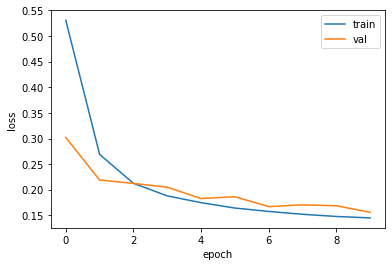

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Accuracy 확인하기

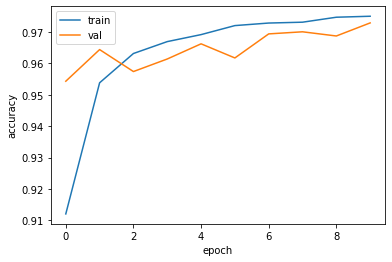

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()